First notebook file for the project

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import optimize

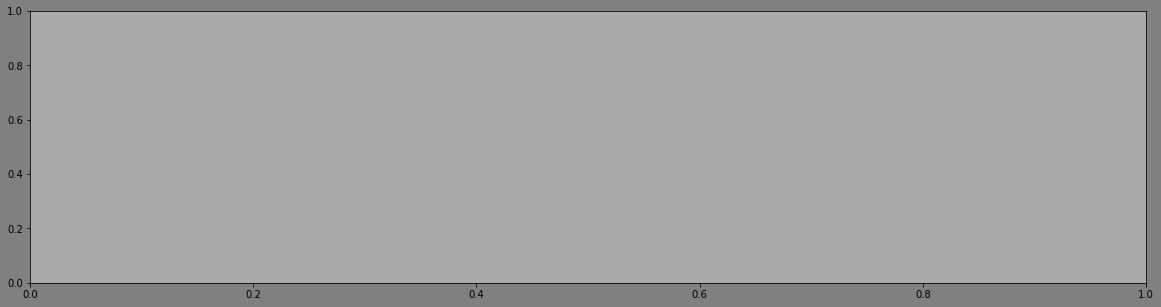

In [88]:
#Absolute temperatures, annual readings for Estonia
data_abs_est = pd.read_csv("Estonia.csv",index_col=1, header=0,  parse_dates=True, squeeze=True)
data_est1=data_abs_est.drop(["Unnamed: 0","AverageTemperatureUncertainty","Country"], axis=1)
data_est=data_est1[2:3122]
data_est_year = data_est.groupby([data_est.index.year]).mean()
data_smooth=data_est_year.ewm(com=5).mean()
plt.figure(figsize=(20,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
plt.plot(data_smooth,"#001f3f",linewidth=2,label="SmoothData")
plt.plot(data_est_year,"#3D9970" ,linewidth=1,label="AbsoluteData")
plt.show()






In [259]:
data_emissions=pd.read_csv("emission data.csv")
world_emissions=data_emissions[data_emissions["Country"]=="World"]
world_emissions


,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
227,World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12


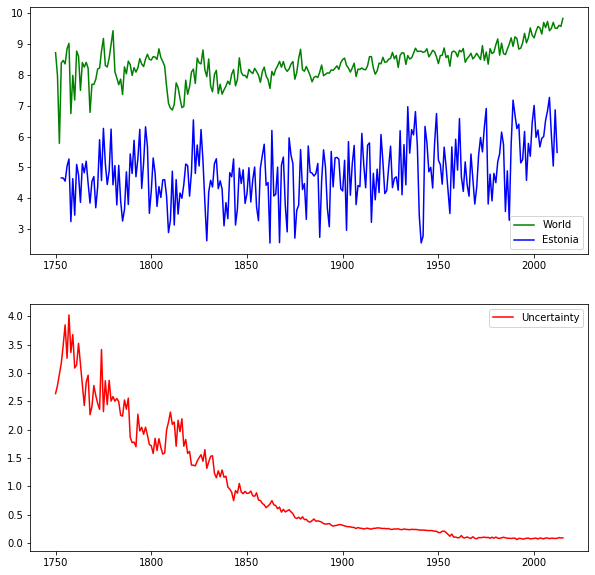

In [7]:
#Absolute temperatures annual global readings
data_absolute=pd.read_csv("GlobalTemperatures.csv",index_col=0, header=0,  parse_dates=True)
data_absolute_1=data_absolute.drop(["LandAverageTemperatureUncertainty","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_1.head()
data_absolute_2=data_absolute.drop(["LandAverageTemperature","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_year = data_absolute_1.groupby([data_absolute_1.index.year]).mean()
data_absolute_year_uncertainty = data_absolute_2.groupby([data_absolute_1.index.year]).mean()
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(data_absolute_year,"-g", label="World")
ax1.plot(data_est_year,"-b",label="Estonia")
ax1.legend(loc=4)
ax2.plot(data_absolute_year_uncertainty,"-r",label="Uncertainty")
ax2.legend(loc=1)
plt.show()




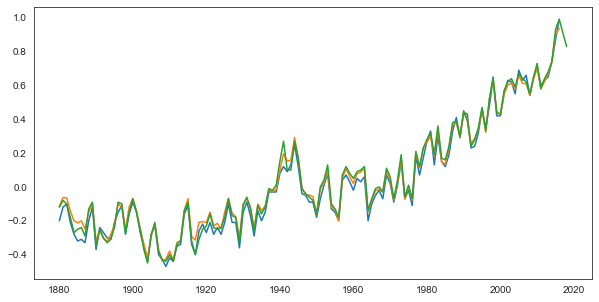

In [249]:
#Temperature variations - temperature readings like these correspond to how different the reading was when compared
#to global average for the years 1900-2000
#Annual readings, 2 dindependent sources: GISTEMP and GCAG
var_annual=pd.read_csv("annual_csv.csv",index_col=1, header=0)
data_variations_annual=var_annual.iloc[::-1]
data_variations_annual.head()
data_variations_GISTEMP=data_variations_annual[data_variations_annual["Source"]=="GISTEMP"]
data_variations_GCAG=data_variations_annual[data_variations_annual["Source"]=="GCAG"]
data_var_GISTEMP=data_variations_GISTEMP.drop("Source",axis=1)
data_var_GCAG=data_variations_GCAG.drop("Source",axis=1)

plt.figure(figsize=(10,5))
plt.plot(data_var_GISTEMP)
plt.plot(data_var_GCAG)
plt.plot(data_variations_NOAA)
plt.show()


In [247]:
#Data from NOAA, 1880-2019, annual readings
data_variations_NOAA=pd.read_csv("data-NOAA.csv",index_col=0, header=0)
data_variations_NOAA.head()


,Value
Year,
1880,-0.12
1881,-0.08
1882,-0.10
1883,-0.18
1884,-0.27
